<a href="https://colab.research.google.com/github/dominikjanyga/network-analysis/blob/main/3_network_analysis_testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
df_officials = pd.read_csv('/content/drive/MyDrive/Projects/network-analysis/company_officials_final.csv', delimiter=';')
df_officials

,Company,Director,Ticker
0,POLSKI KONCERN NAFTOWY ORLEN SA.,Daniel Obajtek,PKN
1,POLSKI KONCERN NAFTOWY ORLEN SA.,Wojciech Jasinski,PKN
2,POLSKI KONCERN NAFTOWY ORLEN SA.,Andrzej Szumanski,PKN
3,POLSKI KONCERN NAFTOWY ORLEN SA.,Kazimiera Janina Goss,PKN
4,POLSKI KONCERN NAFTOWY ORLEN SA.,Barbara Jarzembowska,PKN
...,...,...,...
6637,MILKILAND N.V.,Pavlo Mykhaylovych Sheremeta,MLK
6638,MILKILAND N.V.,Vitaliy Strukov,MLK
6639,MILKILAND N.V.,Willem Scato van Walt Meijer,MLK
6640,MILKILAND N.V.,Pavlo Igorovych Yokhym,MLK


In [21]:
company_officials_count = df_officials.groupby('Director').size().reset_index(name='Count')
company_officials_count.sort_values(by='Count', ascending=False, inplace=True)
company_officials_count.head(10)

,Director,Count
2763,Krzysztof Stanislaw Kaczmarczyk,12
3017,Maciej Matusiak,8
5106,Tadeusz Wesolowski,8
5739,Zofia Dzik,7
4350,Piotr Maciej Kaminski,7
3808,Michal Wnorowski,6
4319,Piotr Kaczmarek,6
3277,Marcin Pawe Marczuk,6
1083,Dariusz Daniluk,6
4302,Piotr Henryk Stepniak,6


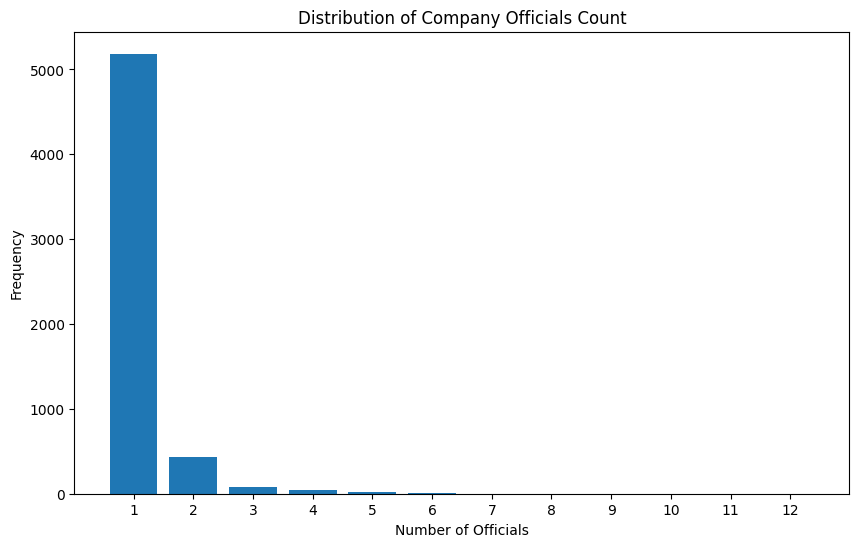

In [23]:
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.hist(company_officials_count['Count'], bins=range(1, 14), align='left', rwidth=0.8) # Adjust bins to your specific data range
plt.xlabel('Number of Officials')
plt.ylabel('Frequency')
plt.title('Distribution of Company Officials Count')
plt.xticks(range(1, 13))  # Ensure all integer counts are shown on x-axis
plt.show()


# Network construction
## Ownership network
Nodes - companies and shareholders. \\
Edges - market value of the ownership percentage.

## Board of directors network

In [26]:
df = pd.read_csv('/content/drive/MyDrive/Projects/network-analysis/shareholder_final.csv')
df

,Shareholder,Ownership_%,Number_of_shares,Market_value,ticker,longName
0,RG Ventures Sp. z o.o,24.46%,3405807.0,10400000.0,06N.WA,Magna Polonia S.A.
1,Grzegorz Miechowski,6.97%,168413.0,47400000.0,11B.WA,11 bit studios S.A.
2,TFI Esaliens SA,6.51%,157257.0,44300000.0,11B.WA,11 bit studios S.A.
3,OFE Nationale-Nederlanden,5.69%,137648.0,38800000.0,11B.WA,11 bit studios S.A.
4,Przemysław Marszał,4.96%,120003.0,33800000.0,11B.WA,11 bit studios S.A.
...,...,...,...,...,...,...
3655,OFE Generali,6.35%,1461659.0,13200000.0,ZUE.WA,ZUE S.A.
3656,ZUE SA,1.15%,264652.0,2390000.0,ZUE.WA,ZUE S.A.
3657,TFI BNP Paribas SA,0.77%,177171.0,1600000.0,ZUE.WA,ZUE S.A.
3658,DFE PKO,0.22%,49763.0,450000.0,ZUE.WA,ZUE S.A.


In [ ]:
df

In [ ]:
G = nx.from_pandas_edgelist(df, source='ticker', target='Shareholder', edge_attr=True)
colors = ['red' if node in df['ticker'].values
          else 'blue'
          for node in G]
edgelist = nx.to_edgelist(G)

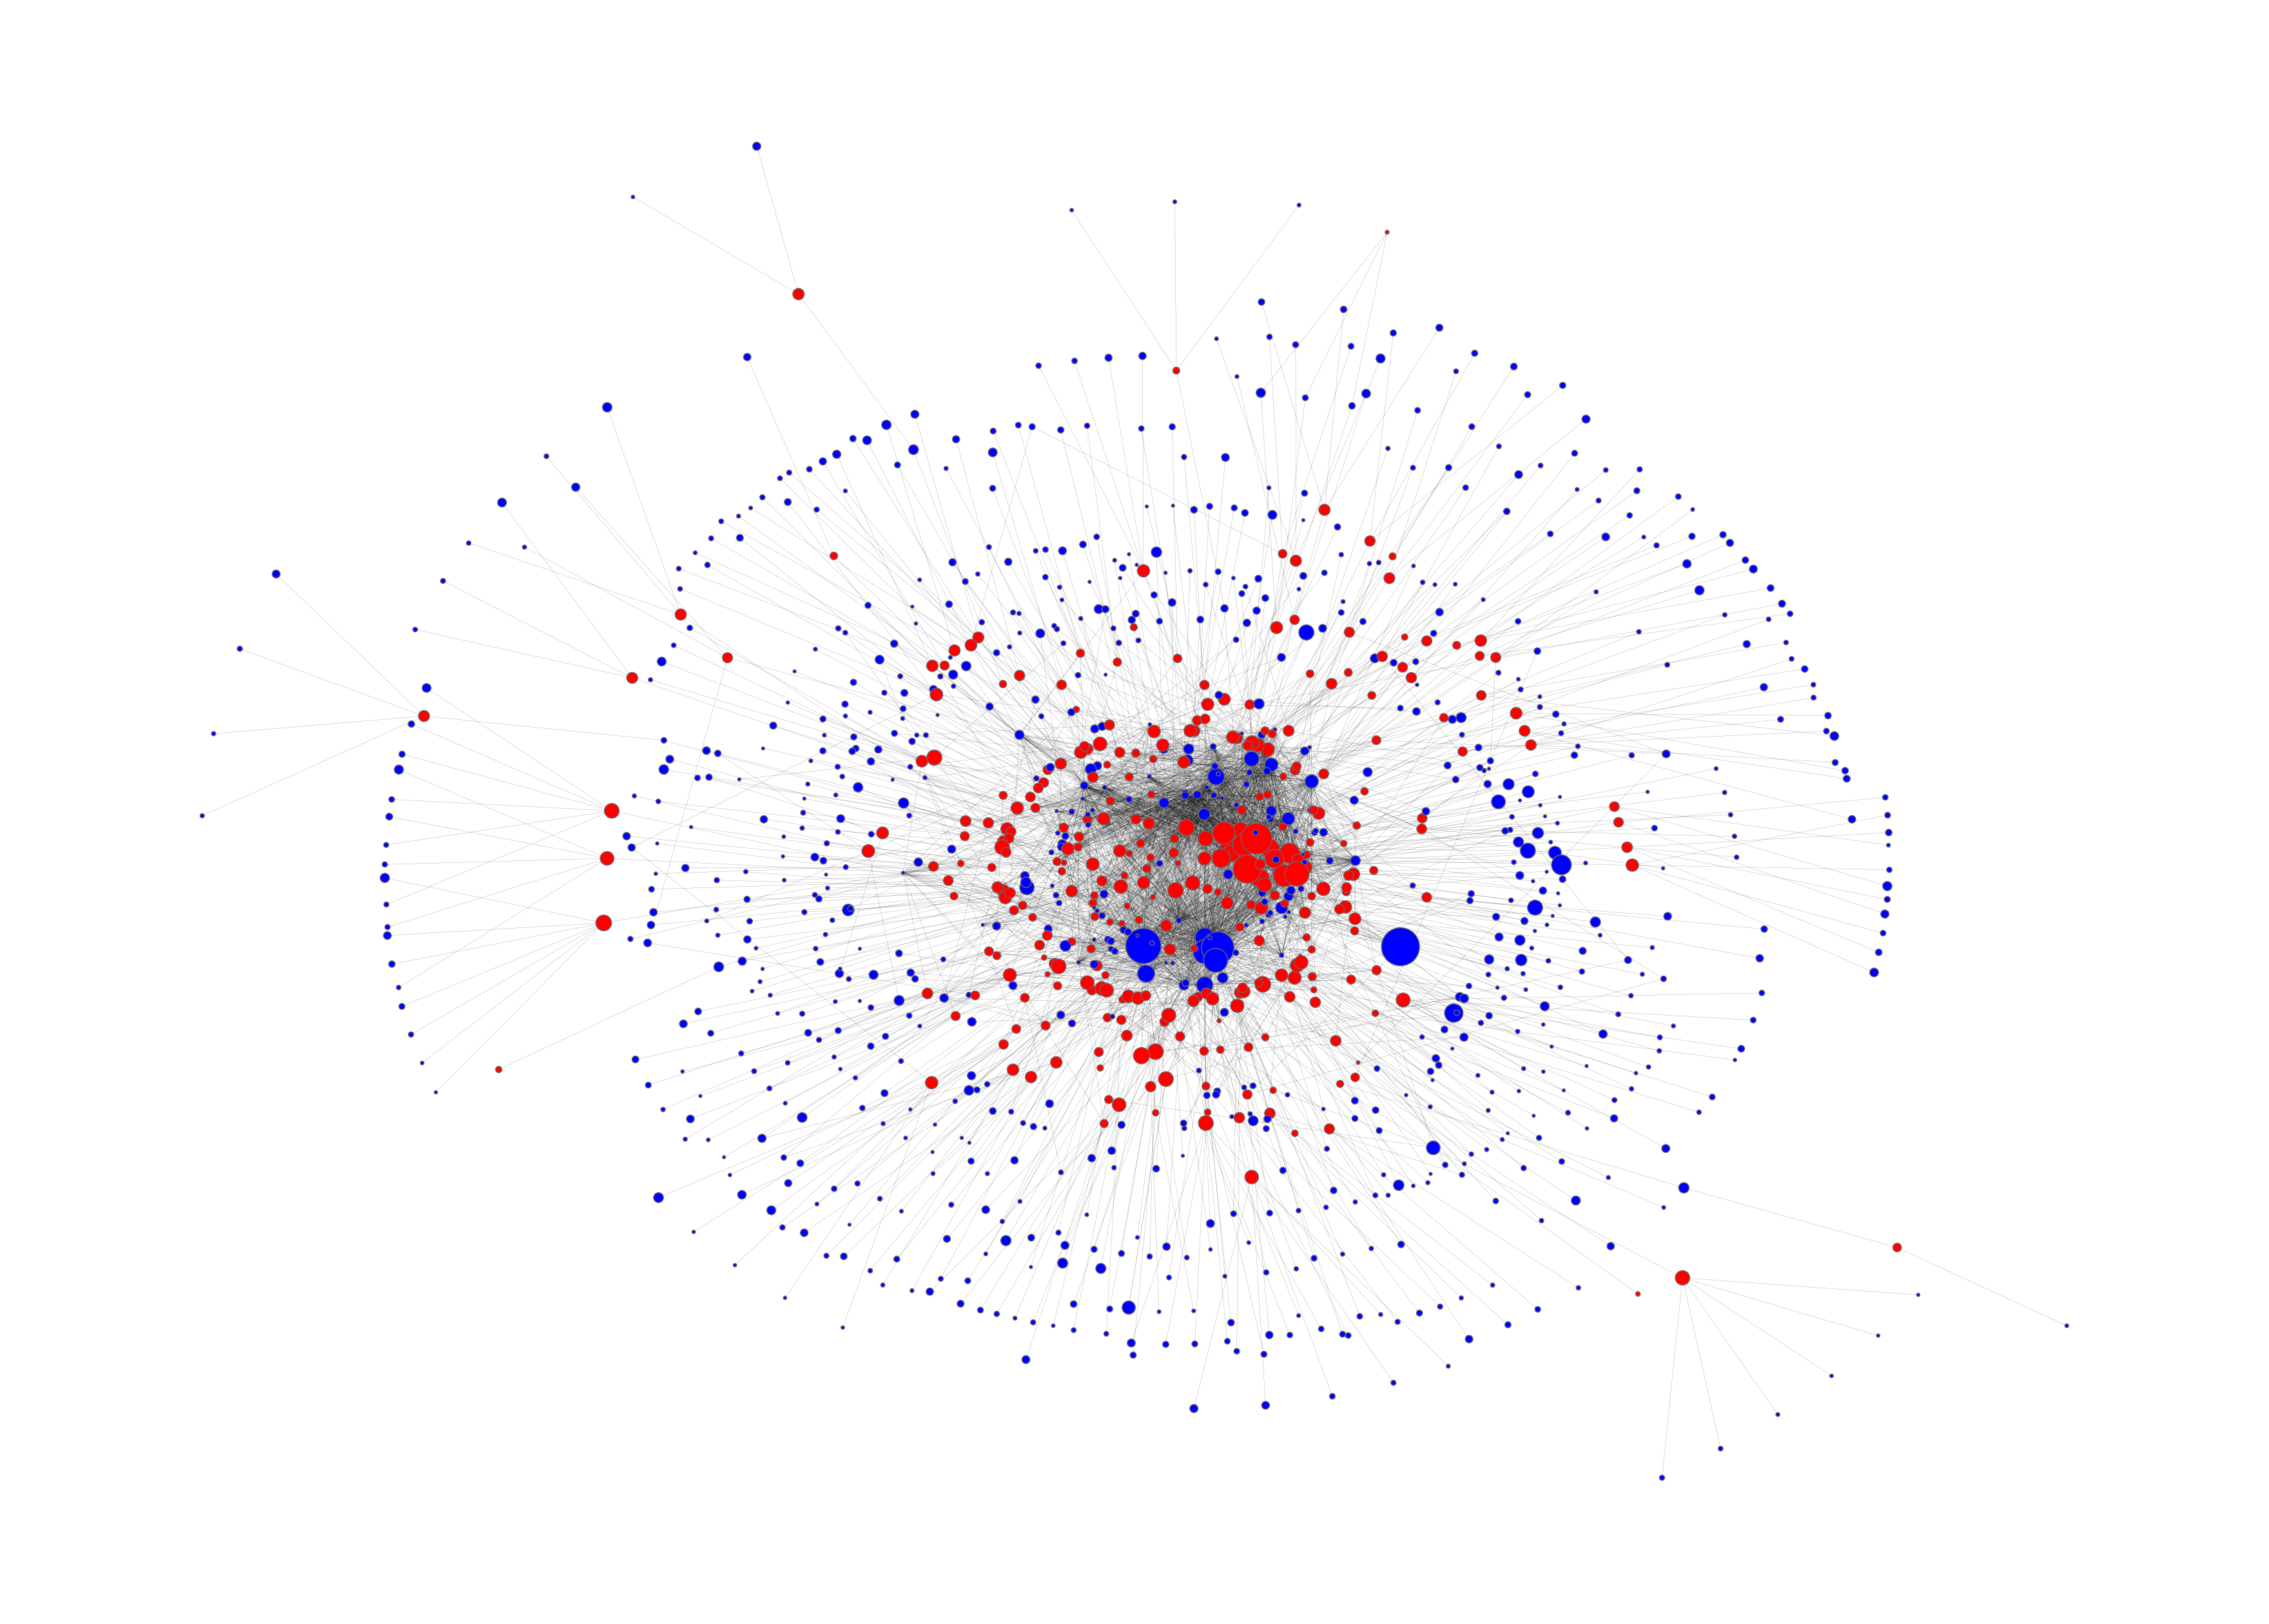

In [ ]:
pagerank = nx.pagerank(G, weight='Market_value', alpha=0.85)
plt.figure(figsize=(35, 25))
min_value=0.1
nx.draw_kamada_kawai(G, with_labels=False, node_color=colors,
node_size = [pagerank[node] * 100000 for node in G],
width=[max(v[2]['Market_value']/1000000000000, min_value)
for v in edgelist],
edgecolors='#696969')
plt.show()

In [28]:
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()
density = nx.density(G)
avg_degree = sum(dict(G.degree()).values()) / len(G)
print(f"Number of nodes: {num_nodes}")
print(f"Number of edges: {num_edges}")
print(f"Density: {density}")
print(f"Average degree: {avg_degree}")

Number of nodes: 1226
Number of edges: 3660
Density: 0.004873988747211772
Average degree: 5.970636215334421


In [ ]:
df['Ownership_%'] = df['Ownership_%'].str.replace('%', '').astype(float)

print(df.isnull().sum())

Shareholder         0
Ownership_%         0
Number_of_shares    0
Market_value        0
ticker              0
dtype: int64


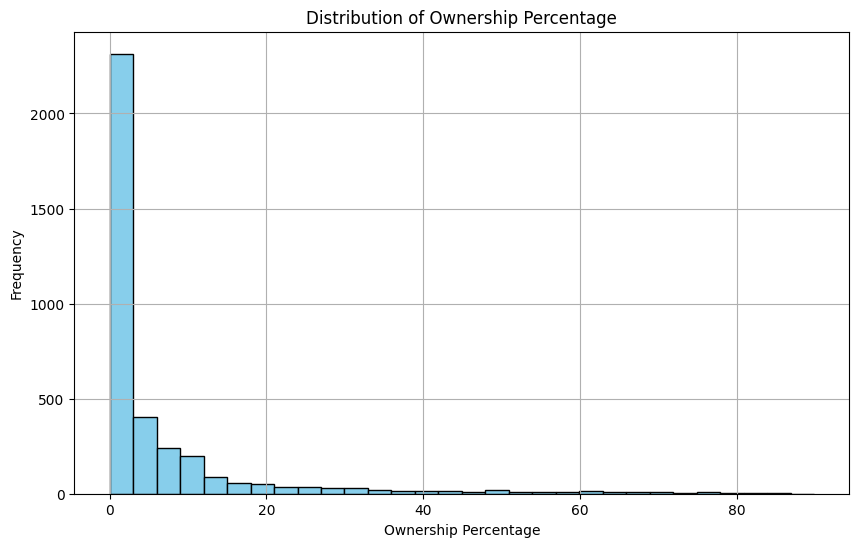

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df['Ownership_%'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Ownership Percentage')
plt.xlabel('Ownership Percentage')
plt.ylabel('Frequency')
plt.grid()
plt.show()

In [ ]:
top_shareholders = df.nlargest(10, 'Market_value')
print(top_shareholders)

                                  Shareholder  Ownership_%  Number_of_shares  \
2905                          Santander Spain        51.84      8.032021e+09   
853          Skarb Państwa Republiki Czeskiej        69.78      3.754093e+08   
3088                       Banco Santander SA        67.41      6.888077e+07   
2641                            Skarb Państwa        49.90      5.793101e+08   
1590                              ING Bank NV        75.00      9.757500e+07   
2671                            Skarb Państwa        29.43      3.679190e+08   
3332  Capital Research and Management Company         6.90      1.128898e+08   
3333                 Aabar Luxembourg S.A.R.L         6.85      1.121412e+08   
1956                           Commerzbank AG        69.07      2.935290e+07   
2906                            BlackRock Inc         5.80      8.992562e+08   

      Market_value ticker  
2905  1.590000e+11    SAN  
853   5.500000e+10    CEZ  
3088  3.230000e+10    SPL  
2641  3

In [ ]:
df.groupby('ticker').agg({'Market_value': 'sum'}).head()

,Market_value
ticker,
06N,1.040000e+07
11B,4.188350e+08
1AT,2.123409e+09
3RG,1.205000e+07
AAT,2.404000e+07


In [ ]:
df.describe()

,Number_of_shares,Market_value
count,3.660000e+03,3.660000e+03
mean,8.200561e+06,2.489720e+08
std,1.384616e+08,3.069443e+09
min,1.130000e+02,3.990000e+03
25%,5.604550e+04,2.387500e+06
50%,3.417230e+05,1.145000e+07
75%,1.793994e+06,4.942500e+07
max,8.032021e+09,1.590000e+11
